In [ ]:
# The first recommender systems is Netflix
#The second is Amazon
#Facebook
#Spotify

In [8]:
pip install pymysql


In [2]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


### Simulated Transaction ###

In [5]:
import pandas as pd 
import pymysql as mysqlconnector
import pandas as pd
import numpy as np

In [8]:
df_jumia = pd.read_csv("Jumia_FINAL.csv")
df_jumia.head()

,Brand_name,Price,Discount,Reviews,Image
0,GUEETON Clé USB OTG en métal 128 Go étanche av...,2500,5%,3.5 out of 5(3052),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
1,GUEETON GUEETON Souris Sans Fil Rechargeable 2...,1710,5%,4 out of 5(3008),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
2,GUEETON 128 GB Metal Usb Flash Drive Adapter C...,2867,5%,3.6 out of 5(1659),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
3,GUEETON Souris Sans Fil Rechargeable 2.4G,1730,5%,4.1 out of 5(2126),https://ci.jumia.is/unsafe/fit-in/300x300/filt...
4,GUEETON Clé USB - OTG 128 Go Micro USB Type C ...,2600,5%,3.5 out of 5(2210),https://ci.jumia.is/unsafe/fit-in/300x300/filt...


In [ ]:
#For jumia

In [6]:
#Right code
import pymysql
import pandas as pd

df_jumia = pd.read_csv("Jumia_FINAL.csv")

connection = pymysql.connect(
    host="localhost",
    user="root",
    password="placali200",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)

cursor = connection.cursor()

insert_query = """
INSERT INTO jumia_products (brand_name, price, image_url)
VALUES (%s, %s, %s)
"""

for _, row in df_jumia.iterrows():
    values = (row["Brand_name"], float(row["Price"]), row["Image"])
    cursor.execute(insert_query, values)

print("✅ Jumia data inserted successfully!")


✅ Jumia data inserted successfully!


In [5]:
#For Coin Afrique

In [ ]:
#How the data looks like for Coin Afrique
Brand | Model | Seller | Location | Price | Image 


In [9]:
df_coin = pd.read_csv("CoinAfrique_FINAL.csv")
df_coin.head()

,Seller,Location,Price,Image,Brand,Model
0,Auto Boss Compagnie,"Cocody, Abidjan",4 800 000,https://images.coinafrique.com/thumb_5612140_u...,Volkswagen,passat 2013
1,georges williams athouman nze,"Cocody, Abidjan",17 500 000,https://images.coinafrique.com/thumb_5582917_u...,Toyota,Camry 2022
2,georges williams athouman nze,"Cocody, Abidjan",13 900 000,https://images.coinafrique.com/thumb_5582929_u...,Suzuki,grand Vitara 2023
3,DIAKITE ( DK Company ),"Cocody, Abidjan",8 800 000,https://images.coinafrique.com/thumb_5601743_u...,Kia,Forte 2020
4,DIAKITE ( DK Company ),"Cocody, Abidjan",8 950 000,https://images.coinafrique.com/thumb_5601745_u...,Mitsubishi,pajero 2018


In [21]:

#Right Code


import pandas as pd
import pymysql
import numpy as np

# Load cleaned CSV (already corrected by you)
df_coin = pd.read_csv("CoinAfrique_FINAL.csv")

# Remove rows with missing price or not numeric
df_coin = df_coin[df_coin["Price"].apply(lambda x: str(x).replace(".", "").isdigit())]

df_coin["Price"] = df_coin["Price"].astype(float)

# --- Connect to MySQL ---
connection = pymysql.connect(
    host="localhost",
    user="root",
    password="placali200",
    database="Project_DM",
    charset="utf8mb4",
    autocommit=True
)
cursor = connection.cursor()

insert_query = """
INSERT INTO coin_afrique_cars (brand, model, seller_name, location, price, image_url)
VALUES (%s, %s, %s, %s, %s, %s)
"""

for _, row in df_coin.iterrows():

    values = (
        row["Brand"],
        row["Model"],
        row["Seller"],
        row["Location"],
        float(row["Price"]),
        row["Image"]
    )

    cursor.execute(insert_query, values)

connection.commit()
print("✅ CoinAfrique data inserted successfully!")


✅ CoinAfrique data inserted successfully!


### Some plots ### 

In [27]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D


C:\Users\PC\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


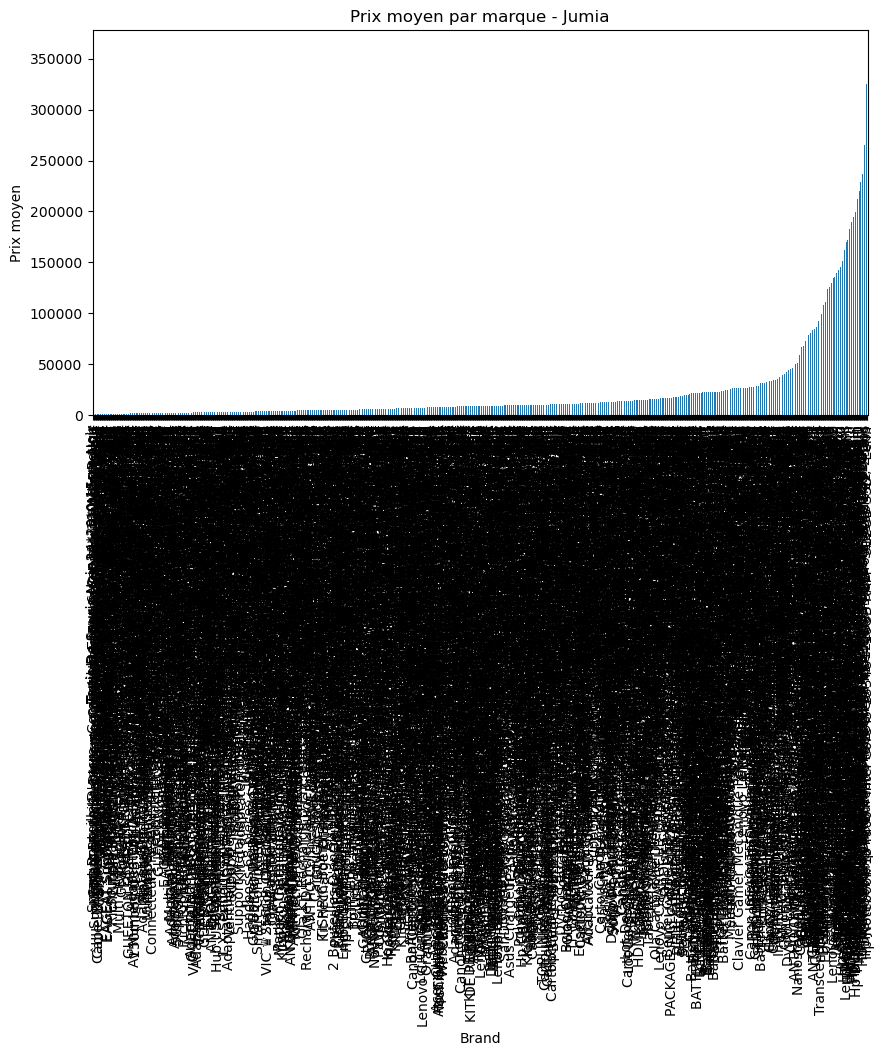

In [28]:
#📊 A. Prix moyen par marque (Jumia)
plt.figure(figsize=(10,5))
df_jumia.groupby("Brand_name")["Price"].mean().sort_values().plot(kind="bar")
plt.title("Prix moyen par marque - Jumia")
plt.xlabel("Brand")
plt.ylabel("Prix moyen")
plt.show()

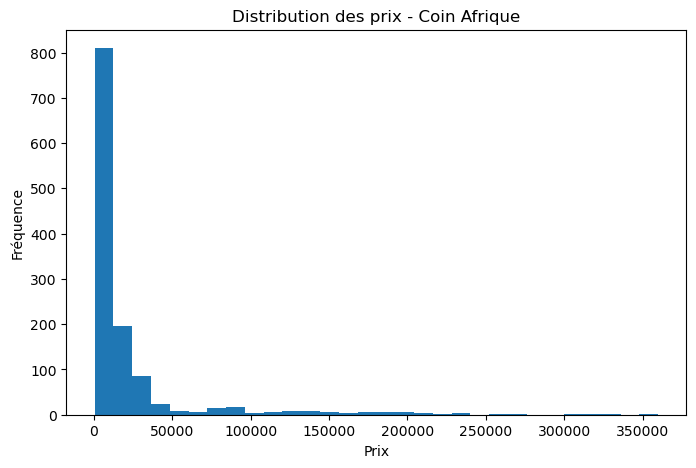

In [32]:
#📊 B. Distribution des prix
plt.figure(figsize=(8,5))
plt.hist(df_coin["Price"], bins=30)
plt.title("Distribution des prix - Coin Afrique")
plt.xlabel("Prix")
plt.ylabel("Fréquence")
plt.show()

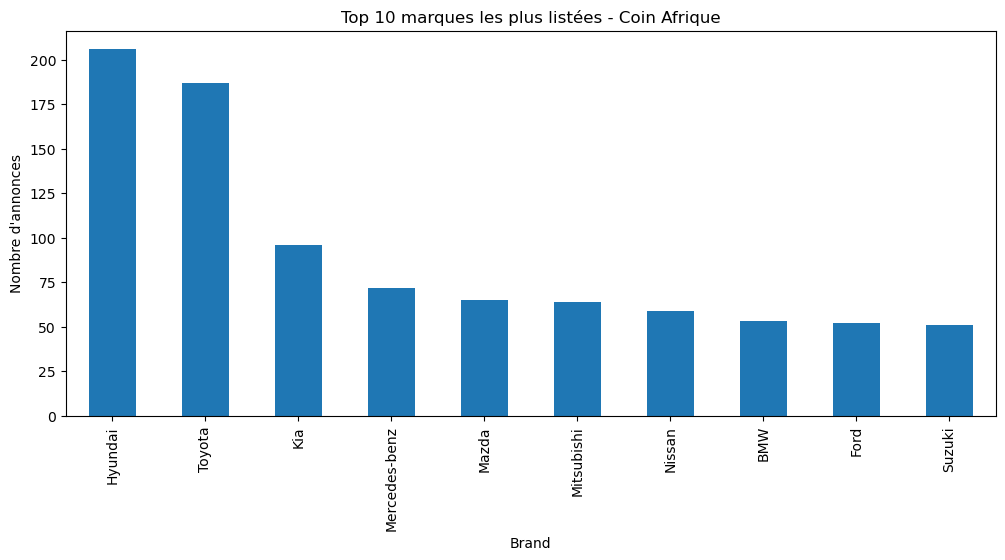

In [34]:
#📊 C. Top 10 marques Coin Afrique
plt.figure(figsize=(12,5))
df_coin["Brand"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 marques les plus listées - Coin Afrique")
plt.xlabel("Brand")
plt.ylabel("Nombre d'annonces")
plt.show()

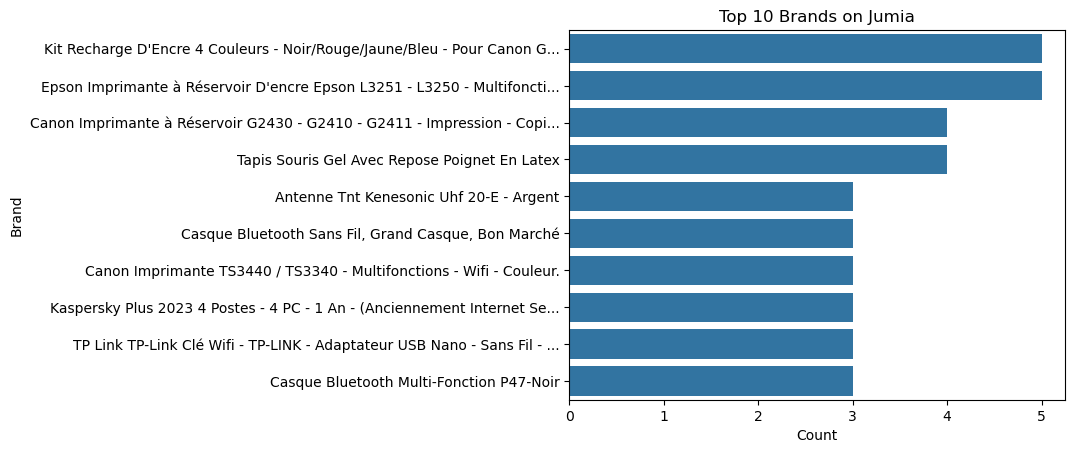

In [43]:
#5️⃣ Optional plots for website dashboard
import matplotlib.pyplot as plt
import seaborn as sns

# Most frequent brands
top_brands = df_jumia["Brand_name"].value_counts().head(10)
sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Brands on Jumia")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()